In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
from user_common import rlm_fit1d, mad

/Users/roz18/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
path = '../misc/fkcor_DES_5_15_2_ab.txt'
with open(path, 'r') as f:
    lines = map(str.rstrip, f.readlines())
columns = lines[0].split()[:10]
des = Table(np.zeros((len(lines)-1, len(columns))), names=columns)
for index in range(0, len(lines)-1):
    des[index] = lines[index+1].split()[1:11]

path = '../misc/fkcor_SNLS_5_15_2_ab_g_renamed.txt'
with open(path, 'r') as f:
    lines = map(str.rstrip, f.readlines())
columns = lines[0].split()[:10]
snls = Table(np.zeros((len(lines)-1, len(columns))), names=columns)
for index in range(0, len(lines)-1):
    snls[index] = lines[index+1].split()[1:11]

In [3]:
mask = (des['DES-g']!=0) & (snls['SNLS-g']!=0)
print(np.sum(mask))

des = des[mask]
snls = snls[mask]

205


In [4]:
print(' '.join(des.colnames))
print(' '.join(snls.colnames))

DES-g DES-r DES-i DES-z DES-u PS1-g PS1-r PS1-i PS1-z PS1-y
SNLS-g SNLS-r SNLS-i SNLS-z SNLS-g1 PS1-g PS1-r PS1-i PS1-z PS1-y


In [5]:
# des_cols = ['DES-g', 'DES-r', 'DES-i', 'DES-z', 'DES-y']
# snls_cols = ['SNLS-u', 'SNLS-g', 'SNLS-r', 'SNLS-i', 'SNLS-z']
# des_cols = ['DES-g', 'DES-r', 'DES-i', 'DES-z']
# snls_cols = ['SNLS-g', 'SNLS-r', 'SNLS-i', 'SNLS-z']
des_cols = {'g':'DES-g', 'r':'DES-r', 'i':'DES-i', 'z':'DES-z'}
snls_cols = {'g':'SNLS-g', 'r':'SNLS-r', 'i':'SNLS-i', 'z':'SNLS-z'}

mags = 'griz'

__Color-color plot (overplotted with DEEP2 objects)__

In [6]:
deep2 = Table.read('/Users/roz18/Documents/Data/LSST_photo-z_testbed/Cross-identification/Moffat v0.6/renamed files/DEEP2_uniq_Terapix_Subaru.fits')

# require reliable redshift
mask = deep2['zquality']>=3
# mask = deep2['zquality']==-1
deep2 = deep2[mask]
print(len(deep2))

# Require valid values in these columns
col_list = ['u_apercor', 'g_apercor', 'r_apercor', 'i_apercor', 'z_apercor', 'u', 'g', 'r', 'i', 'z']
mask = np.ones(len(deep2), dtype=bool)
for index in range(len(col_list)):
    mask = mask & (deep2[col_list[index]]!=99.) & (deep2[col_list[index]]!=-99.)
deep2 = deep2[mask]
print(len(deep2))

# Restrict to CFHTLS deep field
mask = deep2['cfhtls_source']==0
deep2 = deep2[mask]
print(len(deep2))

16857
16255
10543


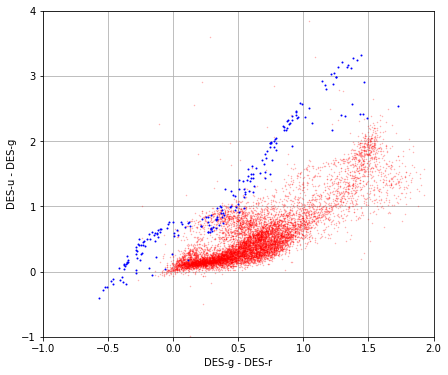

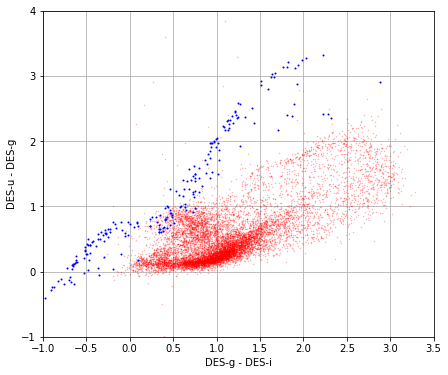

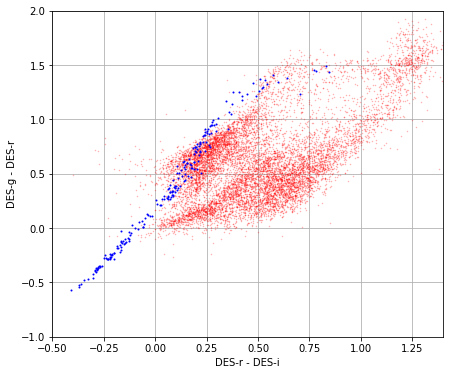

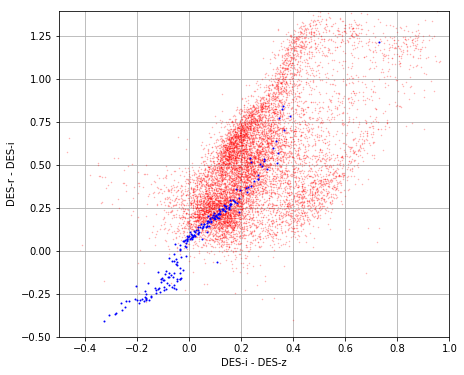

In [7]:
plt.figure(figsize=(7, 6))
plt.plot(deep2['g_apercor']-deep2['r_apercor'], deep2['u_apercor']-deep2['g_apercor'], 'r.', markersize=1, alpha=0.3)
plt.plot(des['DES-g']-des['DES-r'], des['DES-u']-des['DES-g'], 'b.', markersize=2)
plt.axis([-1, 2., -1, 4])
plt.xlabel('DES-g - DES-r')
plt.ylabel('DES-u - DES-g')
plt.grid()
plt.show()

plt.figure(figsize=(7, 6))
plt.plot(deep2['g_apercor']-deep2['i_apercor'], deep2['u_apercor']-deep2['g_apercor'], 'r.', markersize=1, alpha=0.3)
plt.plot(des['DES-g']-des['DES-i'], des['DES-u']-des['DES-g'], 'b.', markersize=2)
plt.axis([-1, 3.5, -1, 4])
plt.xlabel('DES-g - DES-i')
plt.ylabel('DES-u - DES-g')
plt.grid()
plt.show()

plt.figure(figsize=(7, 6))
plt.plot(deep2['r_apercor']-deep2['i_apercor'], deep2['g_apercor']-deep2['r_apercor'], 'r.', markersize=1, alpha=0.3)
plt.plot(des['DES-r']-des['DES-i'], des['DES-g']-des['DES-r'], 'b.', markersize=2)
plt.axis([-0.5, 1.4, -1, 2.])
plt.xlabel('DES-r - DES-i')
plt.ylabel('DES-g - DES-r')
plt.grid()
plt.show()

plt.figure(figsize=(7, 6))
plt.plot(deep2['i_apercor']-deep2['z_apercor'], deep2['r_apercor']-deep2['i_apercor'], 'r.', markersize=1, alpha=0.3)
plt.plot(des['DES-i']-des['DES-z'], des['DES-r']-des['DES-i'], 'b.', markersize=2)
plt.axis([-0.5, 1., -0.5, 1.4])
plt.xlabel('DES-i - DES-z')
plt.ylabel('DES-r - DES-i')
plt.grid()
plt.show()

--------
## Color transformation

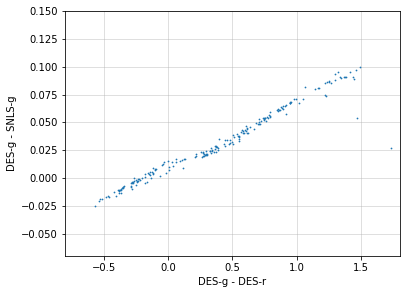

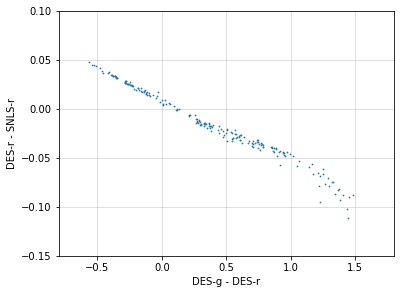

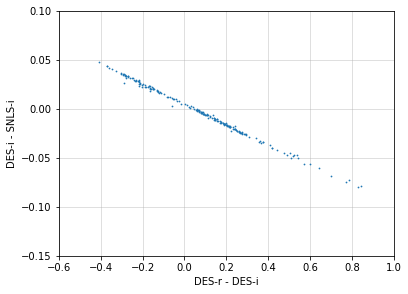

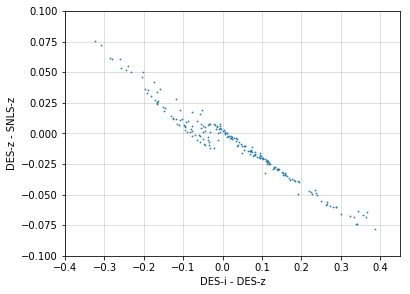

In [8]:
colors = ['gr', 'gr', 'ri', 'iz']

axis_list = [[-0.8, 1.8, -0.07, 0.15], [-0.8, 1.8,  -0.15, 0.1], [-0.6, 1, -0.15, 0.1], [-0.4, 0.45, -0.1, 0.1]]
for index in range(len(mags)):
    mag = mags[index]
    des_col = des_cols[mag]
    snls_col = snls_cols[mag]
    des_col1 = des_cols[colors[index][0]]
    des_col2 = des_cols[colors[index][1]]
    plt.figure(figsize=(6, 4.5))
    plt.plot(des[des_col1]-des[des_col2], 
             des[des_col]-snls[snls_col], '.', markersize=1.5)
    plt.xlabel(des_col1+' - '+des_col2)
    plt.ylabel(des_col+' - '+snls_col)
    plt.axis(axis_list[index])
    plt.grid(alpha=0.5)
    plt.show()

__These colors produce more linear trends:__

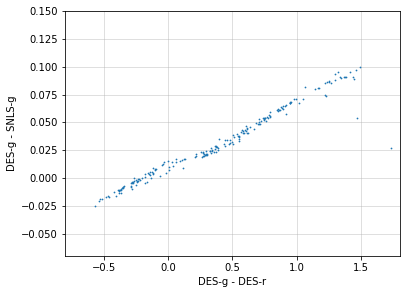

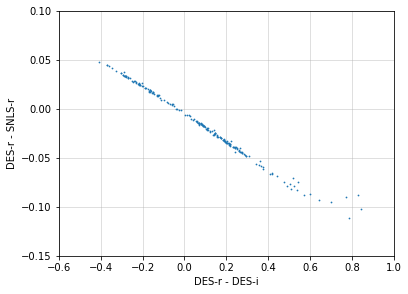

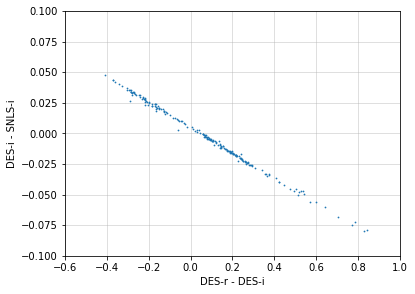

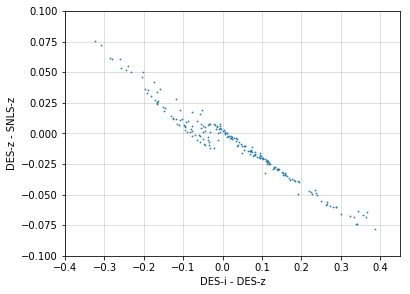

In [9]:
colors = ['gr', 'ri', 'ri', 'iz']

axis_list = [[-0.8, 1.8, -0.07, 0.15], [-0.6, 1, -0.15, 0.1], [-0.6, 1, -0.1, 0.1], [-0.4, 0.45, -0.1, 0.1]]
for index in range(len(mags)):
    mag = mags[index]
    des_col = des_cols[mag]
    snls_col = snls_cols[mag]
    des_col1 = des_cols[colors[index][0]]
    des_col2 = des_cols[colors[index][1]]
    plt.figure(figsize=(6, 4.5))
    plt.plot(des[des_col1]-des[des_col2], 
             des[des_col]-snls[snls_col], '.', markersize=1.5)
    plt.xlabel(des_col1+' - '+des_col2)
    plt.ylabel(des_col+' - '+snls_col)
    plt.axis(axis_list[index])
    plt.grid(alpha=0.5)
    plt.show()

In [10]:
# # As a function of SNLS colors
# axis_list = [[-0.8, 1.8, -0.07, 0.15], [-0.6, 1, -0.15, 0.1], [-0.4, 0.45, -0.1, 0.1], [-0.4, 0.45, -0.1, 0.1]]
# for index in range(len(des_cols)):
#     des_col = des_cols[index]
#     snls_col = snls_cols[index]
#     if index !=3:
#         snls_col1 = snls_cols[index]
#         snls_col2 = snls_cols[index+1]
#     else:
#         snls_col1 = snls_cols[index-1]
#         snls_col2 = snls_cols[index]
#     plt.figure(figsize=(6, 4.5))
#     plt.plot(snls[snls_col1]-snls[snls_col2], 
#              des[des_col]-snls[snls_col], '.', markersize=1.5)
#     plt.xlabel(snls_col1+' - '+snls_col2)
#     plt.ylabel(des_col+' - '+snls_col)
#     plt.axis(axis_list[index])
#     plt.grid(alpha=0.5)
#     plt.show()

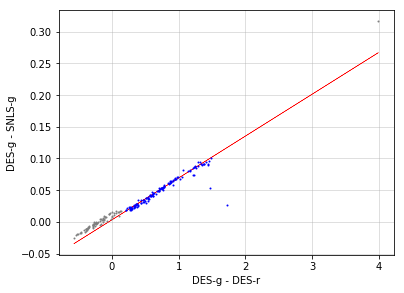

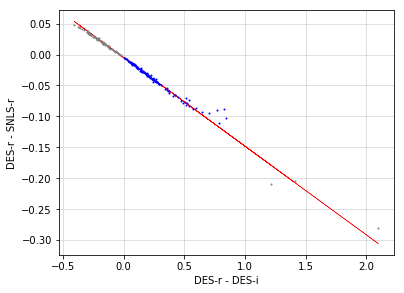

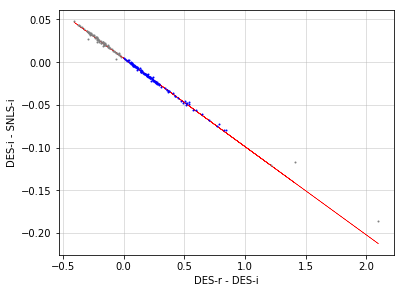

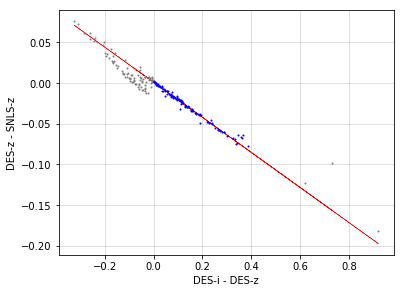

[[ 0.00318266  0.06600571]
 [-0.00461903 -0.14355639]
 [ 0.0045833  -0.10344943]
 [ 0.00100894 -0.21564245]]


In [11]:
colors = ['gr', 'ri', 'ri', 'iz']

# Robust linear fit
xmin_list = [0.2, 0, 0, 0]
xmax_list = [2., 1., 1., 0.4]
axis_list = [[-0.8, 1.8, -0.07, 0.15], [-0.6, 1, -0.15, 0.1], [-0.6, 1.1, -0.12, 0.1], [-0.4, 0.5, -0.12, 0.1]]
params = []
for index in range(len(mags)):
    mag = mags[index]
    des_col = des_cols[mag]
    snls_col = snls_cols[mag]
    des_col1 = des_cols[colors[index][0]]
    des_col2 = des_cols[colors[index][1]]

    x = des[des_col1]-des[des_col2]
    y = des[des_col]-snls[snls_col]
    mask = (x>xmin_list[index]) & (x<xmax_list[index])
    # mask = (x>xmin_list[index])
    t = 0.01
    a0, a1 = rlm_fit1d(x[mask], y[mask], t=t, order=1)
    offset = y[mask] - (a0 + a1 * x[mask])
    t = 2*mad(offset)
    # print(t)
    a0, a1 = rlm_fit1d(x[mask], y[mask], t=t, order=1)
    params.append([a0, a1])
    
    plt.figure(figsize=(6, 4.5))
    plt.plot(x, a0 + a1 * x, lw=0.5, color='r')
    plt.plot(x[~mask], y[~mask], '.', color='grey', markersize=2)
    plt.plot(x[mask], y[mask], 'b.', markersize=2)
    plt.xlabel(des_col1+' - '+des_col2)
    plt.ylabel(des_col+' - '+snls_col)
    # plt.axis(axis_list[index])
    plt.grid(alpha=0.5)
    plt.show()

params = np.array(params)
print(params)

----------
## Color transformation

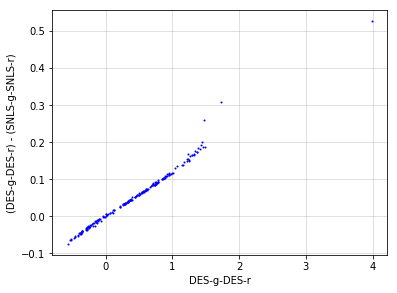

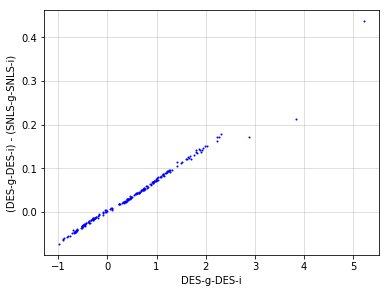

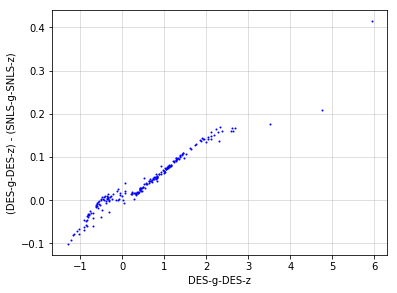

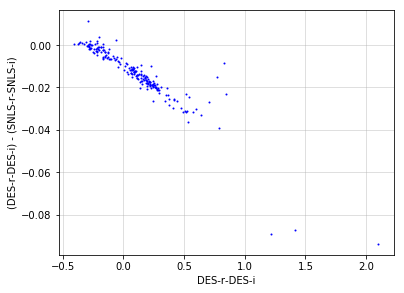

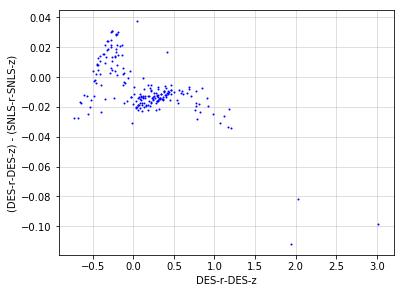

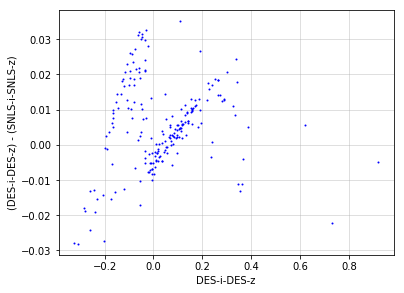

In [12]:
colors = ['gr', 'gi', 'gz', 'ri', 'rz', 'iz']

for index in range(len(colors)):
    des_col1 = des_cols[colors[index][0]]
    des_col2 = des_cols[colors[index][1]]
    snls_col1 = snls_cols[colors[index][0]]
    snls_col2 = snls_cols[colors[index][1]]

    x = des[des_col1]-des[des_col2]
    y = (des[des_col1]-des[des_col2]) - (snls[snls_col1]-snls[snls_col2])
    
    plt.figure(figsize=(6, 4.5))
    plt.plot(x, y, 'b.', markersize=2)
    plt.xlabel('{}-{}'.format(des_col1, des_col2))
    plt.ylabel('({}-{}) - ({}-{})'.format(des_col1, des_col2, snls_col1, snls_col2))
    # plt.axis(axis_list[index])
    plt.grid(alpha=0.5)
    plt.show()

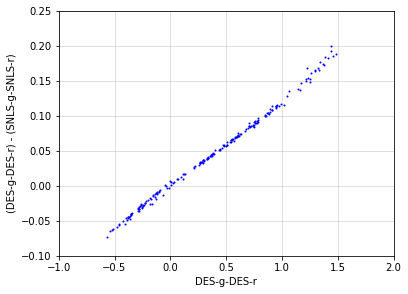

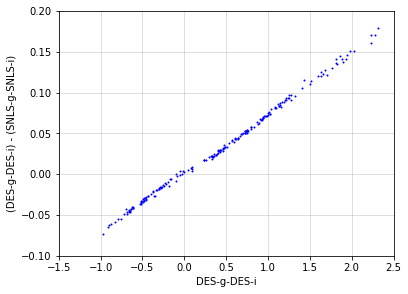

In [13]:
colors = ['gr', 'gi']
axis_list = [[-1, 2, -0.1, 0.25], [-1.5, 2.5, -0.1, 0.2]]

for index in range(len(colors)):
    des_col1 = des_cols[colors[index][0]]
    des_col2 = des_cols[colors[index][1]]
    snls_col1 = snls_cols[colors[index][0]]
    snls_col2 = snls_cols[colors[index][1]]

    x = des[des_col1]-des[des_col2]
    y = (des[des_col1]-des[des_col2]) - (snls[snls_col1]-snls[snls_col2])
    
    plt.figure(figsize=(6, 4.5))
    plt.plot(x, y, 'b.', markersize=2)
    plt.xlabel('{}-{}'.format(des_col1, des_col2))
    plt.ylabel('({}-{}) - ({}-{})'.format(des_col1, des_col2, snls_col1, snls_col2))
    plt.axis(axis_list[index])
    plt.grid(alpha=0.5)
    plt.show()

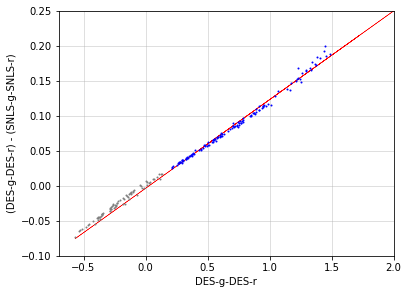

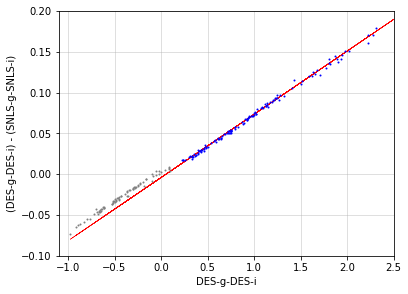

[[-0.00350773  0.12685715]
 [-0.00407353  0.07754013]]


In [14]:
colors = ['gr', 'gi']

# Robust linear fit
xmin_list = [0.2, 0.2]
xmax_list = [1.5, 2.5]
axis_list = [[-0.7, 2, -0.1, 0.25], [-1.1, 2.5, -0.1, 0.2]]
params = []
for index in range(len(colors)):
    
    des_col1 = des_cols[colors[index][0]]
    des_col2 = des_cols[colors[index][1]]
    snls_col1 = snls_cols[colors[index][0]]
    snls_col2 = snls_cols[colors[index][1]]

    x = des[des_col1]-des[des_col2]
    y = (des[des_col1]-des[des_col2]) - (snls[snls_col1]-snls[snls_col2])
    mask = (x>xmin_list[index]) & (x<xmax_list[index])
    # mask = (x>xmin_list[index])
    t = 0.01
    a0, a1 = rlm_fit1d(x[mask], y[mask], t=t, order=1)
    offset = y[mask] - (a0 + a1 * x[mask])
    t = 2*mad(offset)
    # print(t)
    a0, a1 = rlm_fit1d(x[mask], y[mask], t=t, order=1)
    params.append([a0, a1])
    
    plt.figure(figsize=(6, 4.5))
    plt.plot(x, a0 + a1 * x, lw=0.5, color='r')
    plt.plot(x[~mask], y[~mask], '.', color='grey', markersize=2)
    plt.plot(x[mask], y[mask], 'b.', markersize=2)
    plt.xlabel('{}-{}'.format(des_col1, des_col2))
    plt.ylabel('({}-{}) - ({}-{})'.format(des_col1, des_col2, snls_col1, snls_col2))
    plt.axis(axis_list[index])
    plt.grid(alpha=0.5)
    plt.show()

params = np.array(params)
print(params)